Text(0, 0.5, 'f (THz)')

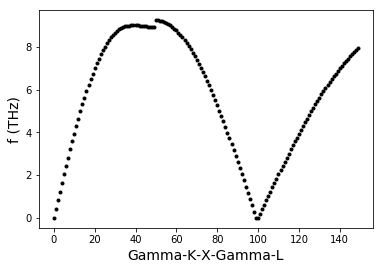

In [50]:
# calculate dispersion for an fcc, monoatomcic basis
# example is for Al, with force constants  @300K for taken
# from PHYSICAL REVIEW B 77, 024301  2008 in N/m
import numpy as np
import matplotlib.pyplot as plt

M = 26.98 * 1.663e-27  # Mass of Al in kg

# some symmetry operations that we will make use of to generate
# the atomic positions and force constant matrices

# 4-fold rotation
Rx = np.array([[1, 0, 0], [0, 0, 1], [0, -1, 0]])  # rotate 90 degrees about x, z-> y, y-> -z
Ry = np.array([[0, 0, 1], [0, 1, 0], [-1, 0, 0]])  # rotate 90 about y
Rz = np.array([[0, 1, 0], [-1, 0, 0], [0, 0, 1]])  # rotate 90 abut z

# mirror about <001> plane
Mxy = np.diag([1, 1, -1])
Mzx = np.diag([1, -1, 1])
Myz = np.diag([-1, 1, 1])

# mirror about <110> planes, also known as swaping x for y, etc.
Syz = np.array([[1, 0, 0], [0, 0, 1], [0, 1, 0]])  # mirror about (011) y <-> z
Szx = np.array([[0, 0, 1], [0, 1, 0], [1, 0, 0]])  # mirror about (101) y <-> x
Sxy = np.array([[0, 1, 0], [1, 0, 0], [0, 0, 1]])  # mirror about (110) x <-> y

R0 = np.zeros(3)

# generate the 12 nearest neighbors in units of the cube of side a
R1 = np.array([1, 1, 0]) / 2.

R1n = np.array([R1,
                Syz.dot(R1),
                Szx.dot(R1),
                Rz.dot(R1),
                Ry.dot(Syz.dot(R1)),
                Rx.dot(Szx.dot(R1))])

R1n = np.concatenate([R1n, -R1n])

# for <110>/2
phi1_xx = 9.708
phi1_xy = 10.378
phi1_zz = -2.059  # in N/m

# note order of the transpose matters.
tmp = np.array([[phi1_xx, phi1_xy, 0], [phi1_xy, phi1_xx, 0], [0, 0, phi1_zz]])
tmp = tmp.reshape((3, 3, 1))
D1n = np.repeat(tmp, repeats=12, axis=2)
D1n[:, :, 2] = Syz.dot(D1n[:, :, 2].dot(Syz.T))
D1n[:, :, 3] = Szx.dot(D1n[:, :, 3].dot(Szx.T))
D1n[:, :, 4] = Rz.dot(D1n[:, :, 4].dot(Rz.T))
D1n[:, :, 5] = Ry.dot(D1n[:, :, 2].dot(Ry.T))
D1n[:, :, 6] = Rx.dot(D1n[:, :, 3].dot(Rx.T))
D1n[:, :, 7:12] = D1n[:, :, 1:6]

# 6, 2nn

R2 = np.array([1, 0, 0])
R2n = np.array([R2, Sxy.dot(R2), Szx.dot(R2), -R2, -Sxy.dot(R2), -Szx.dot(R2)])

# <100>
phi2_xx = 2.224
phi2_yy = -0.367

tmp = np.array([[phi2_xx, 0, 0], [0, phi2_yy, 0], [0, 0, phi2_yy]])
tmp = tmp.reshape((3, 3, 1))
D2n = np.repeat(tmp, 6, axis=2)
D2n[:, :, 2] = Sxy.dot(D2n[:, :, 2].dot(Sxy.T))
D2n[:, :, 3] = Szx.dot(D2n[:, :, 3].dot(Szx.T))
D2n[:, :, 4:6] = D2n[:, :, 1:3]

# 24, 3nn
R3 = np.array([2, 1, 1]) / 2.
R3n = np.array([R3,
                Sxy.dot(R3),
                Szx.dot(R3),
                Myz.dot(R3),
                Mzx.dot(Sxy.dot(R3)),
                Mxy.dot(Szx.dot(R3)),
                Mxy.dot(R3),
                Myz.dot(Sxy.dot(R3)),
                Mzx.dot(Szx.dot(R3)),
                Mzx.dot(R3),
                Mxy.dot(Sxy.dot(R3)),
                Myz.dot(Szx.dot(R3))])

R3n = np.concatenate([R3n, -R3n])

# <211> xx ?0.635 xy ?0.294 yy ?0.181 yz ?0.148
phi3_xx = -0.635
phi3_xy = -0.294
phi3_yy = -0.181
phi3_yz = -0.148

tmp = np.array([[phi3_xx, phi3_xy, phi3_xy],
                [phi3_xy, phi3_yy, phi3_yz],
                [phi3_xy, phi3_yz, phi3_yy]])
tmp = tmp.reshape((3, 3, 1))
D3n = np.repeat(tmp, 24, axis=2)
D3n[:, :, 2] = Sxy.dot(D3n[:, :, 2].dot(Sxy.T))
D3n[:, :, 3] = Szx.dot(D3n[:, :, 3].dot(Szx.T))
D3n[:, :, 4] = Myz.dot(D3n[:, :, 1].dot(Myz.T))
D3n[:, :, 5] = Mzx.dot(D3n[:, :, 2].dot(Mzx.T))
D3n[:, :, 6] = Mxy.dot(D3n[:, :, 3].dot(Mxy.T))
D3n[:, :, 7] = Mxy.dot(D3n[:, :, 1].dot(Mxy.T))
D3n[:, :, 8] = Myz.dot(D3n[:, :, 2].dot(Myz.T))
D3n[:, :, 9] = Mzx.dot(D3n[:, :, 3].dot(Mzx.T))
D3n[:, :, 10] = Mzx.dot(D3n[:, :, 1].dot(Mzx.T))
D3n[:, :, 11] = Mxy.dot(D3n[:, :, 2].dot(Mxy.T))
D3n[:, :, 12] = Myz.dot(D3n[:, :, 3].dot(Myz.T))
D3n[:, :, 13:24] = D3n[:, :, 1:12]

# 12 4nn
R4 = np.array([1, 1, 0])
R4n = np.array([R4,
                Syz.dot(R4),
                Szx.dot(R4),
                Rz.dot(R4),
                Ry.dot(Syz.dot(R4)),
                Rx.dot(Szx.dot(R4))])
R4n = np.concatenate([R4n, -R4n])

# <110> 
phi4_xx = 0.273
phi4_xy = -0.051
phi4_zz = -0.051

tmp = np.array([[phi4_xx, phi4_xy, 0],
                [phi4_xy, phi4_xx, 0],
                [0, 0, phi4_zz]])
tmp = tmp.reshape((3, 3, 1))
D4n = np.repeat(tmp, 12, axis=2)
D4n[:, :, 2] = Syz.dot(D4n[:, :, 2].dot(Syz.T))
D4n[:, :, 3] = Szx.dot(D4n[:, :, 3].dot(Szx.T))
D4n[:, :, 4] = Rz.dot(D4n[:, :, 4].dot(Rz.T))
D4n[:, :, 5] = Ry.dot(D4n[:, :, 2].dot(Ry.T))
D4n[:, :, 6] = Rx.dot(D4n[:, :, 3].dot(Rx.T))
D4n[:, :, 7:12] = D4n[:, :, 1:6]

# assemble the lattice sites and force constants into single big matrix
R = np.concatenate([R1n, R2n, R3n, R4n])

DR = np.concatenate([np.moveaxis(D1n, 2, 0),
                     np.moveaxis(D2n, 2, 0),
                     np.moveaxis(D3n, 2, 0),
                     np.moveaxis(D4n, 2, 0)])

NR = R.shape[0]  # number of atoms pairs

# construct a path along high symmetry direction G-K-X-G-L
eta = np.linspace(0, 1)
q = np.concatenate([np.outer(eta, np.array([1, 1, 0])),
                    np.outer(np.flip(eta), np.array([1, 0, 0])),
                    np.outer(eta, np.array([1. / 2., 1. / 2., 0]))])
Nq = q.shape[0]

# Dynamical matrix, i.e. f.t. of D(R).
# makes use of monoatomic basis and sum rule
# this is why expand as 2* sin^2(pi q * R)
# see Aschcroft and Mermin.
# generally will not work for polyatomic basis.

Dq = 2 * np.tensordot(np.sin(np.pi * np.dot(q, R.T)) ** 2, DR, axes=1)

e = np.zeros((Nq, 3, 3))  # eigenvectors
w = np.zeros((Nq, 3))  # eigenvalues

# diagonalize the matrix


for j in range(Nq):
    tmp, e[j, :, :] = np.linalg.eig(Dq[j, :, :])
    w[j, :] = np.sqrt(tmp / M)

Text(0, 0.5, 'f (THz)')

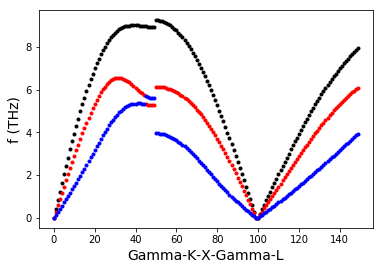

In [51]:
# plot the dispersion
plt.plot(np.arange(Nq), w[:, 0] / 2. / np.pi / 1e12, '.k')

plt.plot(np.arange(Nq), w[:, 1] / 2. / np.pi / 1e12, '.r')

plt.plot(np.arange(Nq), w[:, 2] / 2. / np.pi / 1e12, '.b')

plt.xlabel('Gamma-K-X-Gamma-L', fontsize=14)
plt.ylabel('f (THz)', fontsize=14)
